In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
from sklearn import datasets

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


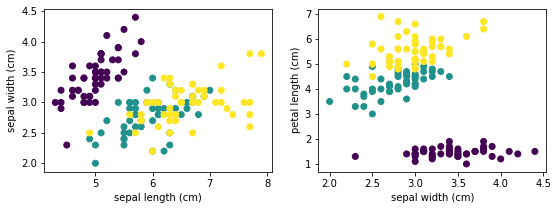

In [3]:
# load iris dataset: 3 classes, 4 features, 50 samples

iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [7]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.3 ,random_state=4)

In [8]:
# shape of train and test objects

print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [9]:
# shape of new y objects

print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data.
The standard score of a sample x is calculated as: z = (x - u) / s, where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

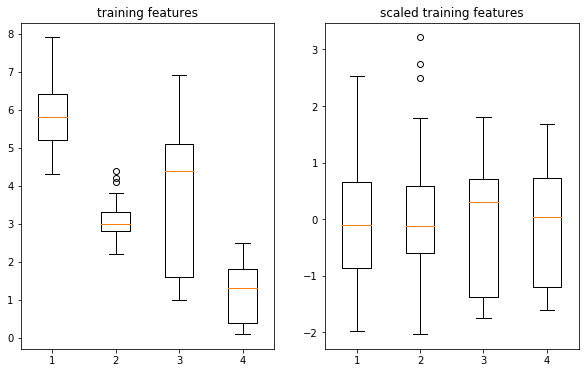

In [10]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_ss = scaler.transform(X_train)  
X_test_ss = scaler.transform(X_test) 
X_ALL_ss = scaler.transform(data) 

input_data=(X_train, X_train_ss)
label=('training features', 'scaled training features')
fig, axs=plt.subplots(1, 2, figsize=(10,6))

for i, X_IN in enumerate(input_data):
  axs[i].boxplot(X_IN)
  axs[i].set_title(label[i])

plt.show()

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

The advantages of Multi-layer Perceptron (MLP) are:
- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:
- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.


max_iter, default=200 --> Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. 
For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number 
of gradient steps.

to optimize: # of neurons, #of hidden layers, epoch, learning rate

### Neural network - 1st use


Solver:  adam
adam : Accuracy is [0.33333333333333337, 0.33333333333333337, 0.9800000000000001, 0.32666666666666666, 0.9866666666666667, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9866666666666667]
adam : Max Accuracy is 0.9866666666666667
adam : Lowest number of neurons in hidden layers,with the maximum accuracy is 5

Solver:  sgd
sgd : Accuracy is [0.33333333333333337, 0.33333333333333337, 0.9733333333333334, 0.33333333333333337, 0.96, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001]
sgd : Max Accuracy is 0.9800000000000001
sgd : Lowest number of neurons in hidden layers,with the maximum accuracy is 6


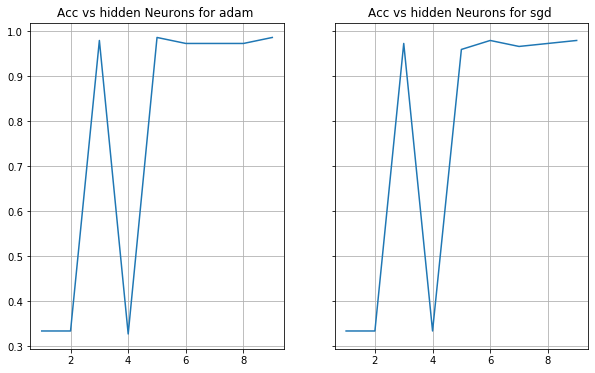

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# number of cross validation

cv=10

# maximum number of neurons to be evaluated

max_number_of_neurons=10

# list of solvers

solver_l = ('adam','sgd')
accuracy_matrix = []

fig,axs = plt.subplots(1,len(solver_l),figsize=(5*len(solver_l),6),sharey=True)

# loop to choose the solver

for i, solver in enumerate(solver_l):
  print('\nSolver: ',solver)
  #print('i= ',i)
  accuracy=[]

  # loop to choose the number of hidden neurons
  for hidden_layers_neurons in range(1, max_number_of_neurons):
    #print('Hidden Neurons: ',hidden_layers_neurons)
    
    # create the MLP
    mlp = MLPClassifier(solver=solver, 
                        alpha=1e-5,
                        hidden_layer_sizes=(hidden_layers_neurons, hidden_layers_neurons,), 
                        random_state=1,
                        max_iter=10000)
    
    #Store the scoring (mean of accuracy of cv corss validation) got by 
    #'cross_val_score'
    accuracy.append(cross_val_score(mlp,
                                    data,
                                    labels,
                                    scoring='accuracy',cv=cv).mean())
  ###########################################

  # store the scoring given one solver of soler_l list 
  accuracy_matrix.append(accuracy)

  print(solver,': Accuracy is', accuracy_matrix[i])
  print(solver,': Max Accuracy is', max(accuracy_matrix[i]))
  print(solver,': Lowest number of neurons in hidden layers,with the maximum accuracy is', (accuracy_matrix[i].index(max(accuracy_matrix[i]))+1))
  
  asse_X=np.arange(1,10)
  axs[i].plot(asse_X,accuracy_matrix[i])
  axs[i].set_title('Acc vs hidden Neurons for %s ' % solver_l[i])
  axs[i].grid(True)

### Neural network - 2nd use

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

mlp = MLPClassifier(max_iter=1000)

# Define a hyper-parameter space to search. 
parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive'],}


clf = GridSearchCV(mlp, 
                   parameters, 
                   n_jobs=-1, 
                   cv=3,
                   scoring='accuracy')
'''
Note: 
The parameter n_jobs is to define how many CPU cores from your computer to use (-1 is for all the cores available). 
The cv is the number of splits for cross-validation.
'''

clf.fit(X_train, y_train)

# Best parameters set

print('Best parameters found:\n', clf.best_params_)
y_pred_test = clf.predict(X_test)
print('\nResults on the test set:')
print(classification_report(y_test, y_pred_test))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

